In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Understanding

Load dataset

In [341]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("./labeled_dataset.csv", delimiter=',', skiprows=[0], names=['att_name', 'datatype', 'semantic_type', 'correct_data_type'])
# df = df.sample(frac=1, random_state=100)
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.head()

Number of training sentences: 605



,att_name,datatype,semantic_type,correct_data_type
0,id,bigint,Identifier,bigint
1,name,text,Name,text
2,created_at,timestamp without time zone,event timestamp,timestamp without time zone
3,updated_at,timestamp without time zone,event timestamp,timestamp without time zone
4,right_identifier,character varying,Identifier,character varying


In [342]:
# Get the lists of sentences and their labels.
data_types = df.datatype.values
att_names = df.att_name.values

Dataset Statistics

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   att_name           605 non-null    object
 1   datatype           605 non-null    object
 2   semantic_type      478 non-null    object
 3   correct_data_type  605 non-null    object
dtypes: object(4)
memory usage: 19.0+ KB


In [344]:
df.describe()

,att_name,datatype,semantic_type,correct_data_type
count,605,605,478,605
unique,304,21,41,22
top,id,character varying,event timestamp,character varying
freq,57,111,142,94


Used data types and their occurence

In [345]:
df.datatype.unique()

array(['bigint', 'text', 'timestamp without time zone',
       'character varying', 'integer', 'boolean', 'uuid', 'jsonb', 'json',
       'timestamp with time zone', 'ARRAY', 'USER-DEFINED', 'bytea',
       'oid', 'name', 'regnamespace', 'inet', 'date', 'double precision',
       'numeric', 'smallint'], dtype=object)

In [346]:
data_type_count =  {type: 0 for type in data_types}
for type in data_types:
    data_type_count[type] += 1

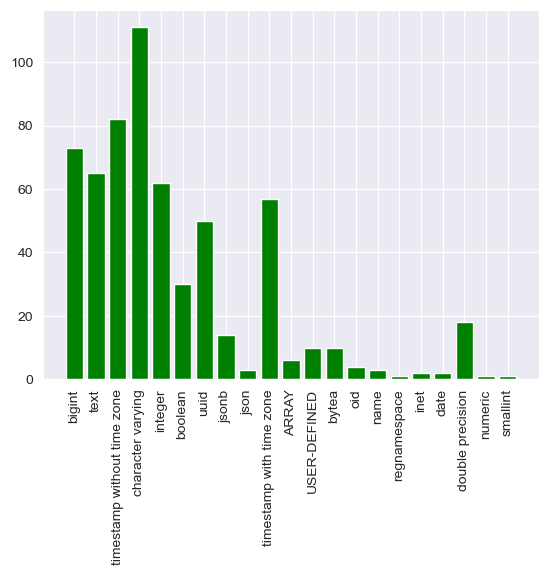

In [347]:
#visualize the distribution of semantic types
fig = plt.figure()
plt.bar(data_type_count.keys(), data_type_count.values(), color='g', as)
plt.xticks(rotation=90)
plt.show()

From the above plot, we can see that the data types are data types of PostgreSQL. The data types are highly imbalanced. We will need to balance the data types in the training set.

Attribute names and their occurence

In [348]:
unique_att_names = df.att_name.unique()
unique_att_names

array(['id', 'name', 'created_at', 'updated_at', 'right_identifier',
       'general_image', 'plate_image', 'stream_image',
       'mess_parking_right_id', 'passage_request_id', 'needs_attention',
       'actor_type', 'group_allocation_id', 'status', 'event_context',
       'car_park_id', 'in_violation_from', 'actor_id', 'early_arrival',
       'key', 'value', 'instance_id', 'ip_address', 'payload',
       'entity_id', 'event', 'previous_version', 'creation_date',
       'creator', 'operation', 'table_name', 'access_token',
       'refresh_token', 'id_token', 'uuid', 'user_id', 'expires_at',
       'banned_by_user_name', 'reason', 'allowed_mime_types', 'owner',
       'public', 'avif_autodetection', 'file_size_limit',
       'organisation_uuid', 'building_id', 'organisation_name',
       'time_zone', 'address_line_2', 'address_line_1', 'tenant_id',
       'camera_type', 'car_park_gate_id', 'gate_id',
       'allowed_displays_count', 'register', 'show_availability',
       'counting_boa

In [349]:
# unique_att_names_count = len(unique_att_names)
# print('Number of unique attribute names: {:,}\n'.format(unique_att_names_count))

Number of unique attribute names: 304



In [350]:
att_name_count =  {name: 0 for name in att_names}

In [351]:
for name in att_names:
    att_name_count[name] += 1

In [352]:
#top 20 attributes
att_name_count = dict(sorted(att_name_count.items(), key=lambda item: item[1], reverse=True))
att_name_count = dict(list(att_name_count.items())[:30])

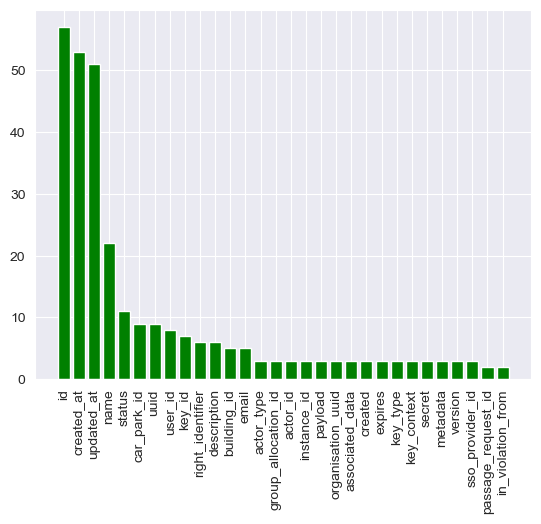

In [353]:
#visualize top 20 attributes
fig = plt.figure()
fig.figsize = (90, 30)
plt.bar(att_name_count.keys(), att_name_count.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [354]:
#top 30 attributes most frequent for data type 'bigint', 'integer', 'smallint'
df_bigint = df[df['datatype'] == 'bigint']
df_integer = df[df['datatype'] == 'integer']
df_smallint = df[df['datatype'] == 'smallint']
df_int = pd.concat([df_bigint, df_integer, df_smallint])
att_names_int = df_int.att_name.values
att_name_count_int =  {name: 0 for name in att_names_int}
for name in att_names_int:
    att_name_count_int[name] += 1
att_name_count_int = dict(sorted(att_name_count_int.items(), key=lambda item: item[1], reverse=True))
att_name_count_int = dict(list(att_name_count_int.items())[:30])

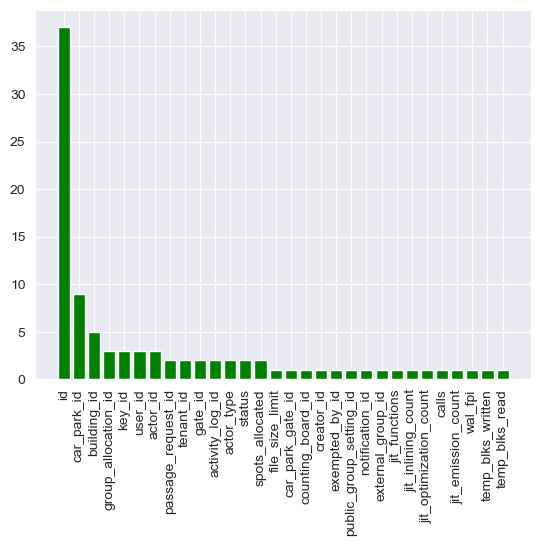

In [355]:
#visualize top 30 attributes most frequent for data type 'bigint'
fig = plt.figure()
plt.bar(att_name_count_int.keys(), att_name_count_int.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [356]:
#top 30 attributes most frequent for data type 'character varying', 'text',
df_character_varying = df[df['datatype'] == 'character varying']
df_text = df[df['datatype'] == 'text']
df_char = pd.concat([df_character_varying, df_text])
att_names_char = df_char.att_name.values
att_name_count_char =  {name: 0 for name in att_names_char}
for name in att_names_char:
    att_name_count_char[name] += 1
att_name_count_char = dict(sorted(att_name_count_char.items(), key=lambda item: item[1], reverse=True))
att_name_count_char = dict(list(att_name_count_char.items())[:30])

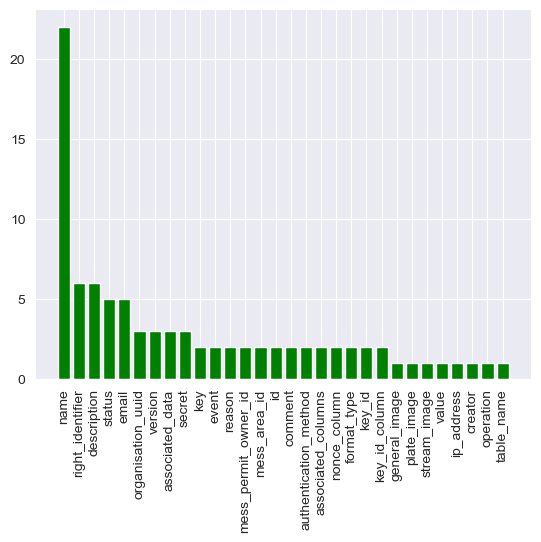

In [357]:
#visualize top 30 attributes most frequent for data type 'character varying'
fig = plt.figure()
plt.bar(att_name_count_char.keys(), att_name_count_char.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [358]:
#top 30 attributes most frequent for data type 'timestamp without time zone', 'timestamp with time zone'
df_timestamp_without = df[df['datatype'] == 'timestamp without time zone']
df_timestamp_with = df[df['datatype'] == 'timestamp with time zone']
df_timestamp = pd.concat([df_timestamp_without, df_timestamp_with])
att_names_timestamp = df_timestamp.att_name.values
att_name_count_timestamp =  {name: 0 for name in att_names_timestamp}
for name in att_names_timestamp:
    att_name_count_timestamp[name] += 1
att_name_count_timestamp = dict(sorted(att_name_count_timestamp.items(), key=lambda item: item[1], reverse=True))
att_name_count_timestamp = dict(list(att_name_count_timestamp.items())[:30])

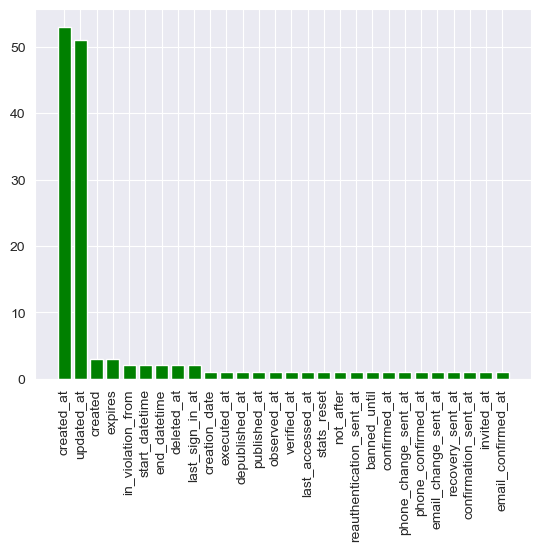

In [359]:
#visualize top 30 attributes most frequent for data type 'timestamp without time zone'
fig = plt.figure()
plt.bar(att_name_count_timestamp.keys(), att_name_count_timestamp.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [360]:
#top 30 attributes most frequent for data type 'numeric'
df_numeric = df[df['datatype'] == 'numeric']
att_names_numeric = df_numeric.att_name.values
att_name_count_numeric =  {name: 0 for name in att_names_numeric}
for name in att_names_numeric:
    att_name_count_numeric[name] += 1
att_name_count_numeric = dict(sorted(att_name_count_numeric.items(), key=lambda item: item[1], reverse=True))
att_name_count_numeric = dict(list(att_name_count_numeric.items())[:30])

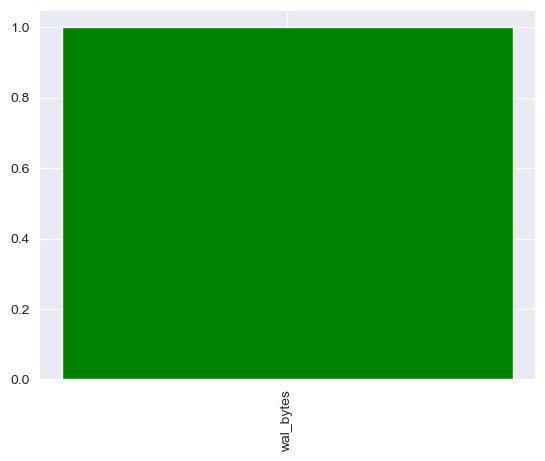

In [361]:
#visualize top 30 attributes most frequent for data type 'numeric'
fig = plt.figure()
plt.bar(att_name_count_numeric.keys(), att_name_count_numeric.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [362]:
#top 30 attributes most frequent for data type 'boolean'
df_boolean = df[df['datatype'] == 'boolean']
att_names_boolean = df_boolean.att_name.values
att_name_count_boolean =  {name: 0 for name in att_names_boolean}
for name in att_names_boolean:
    att_name_count_boolean[name] += 1
att_name_count_boolean = dict(sorted(att_name_count_boolean.items(), key=lambda item: item[1], reverse=True))
att_name_count_boolean = dict(list(att_name_count_boolean.items())[:30])

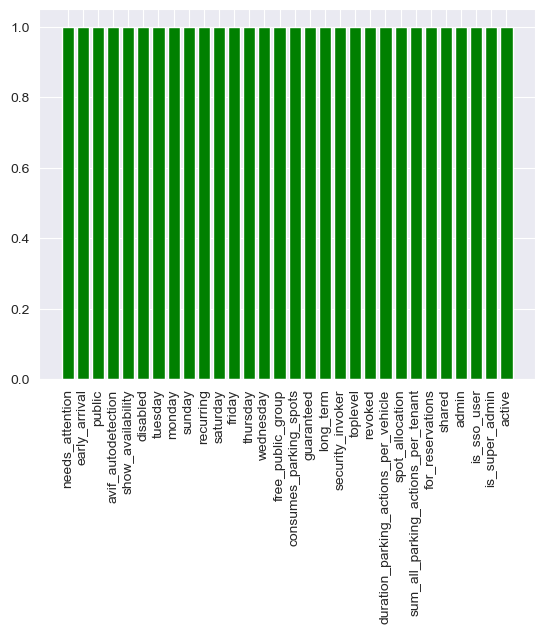

In [363]:
#visualize top 30 attributes most frequent for data type 'boolean'
fig = plt.figure()
plt.bar(att_name_count_boolean.keys(), att_name_count_boolean.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [364]:
#top 30 attributes most frequent for data type 'date'
df_date = df[df['datatype'] == 'date']
att_names_date = df_date.att_name.values
att_name_count_date =  {name: 0 for name in att_names_date}
for name in att_names_date:
    att_name_count_date[name] += 1
att_name_count_date = dict(sorted(att_name_count_date.items(), key=lambda item: item[1], reverse=True))
att_name_count_date = dict(list(att_name_count_date.items())[:30])


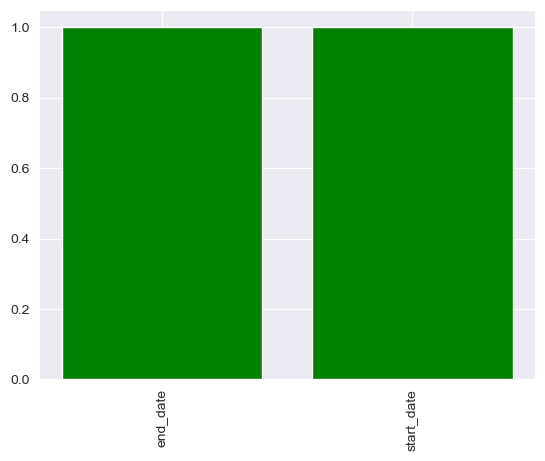

In [365]:
#visualize top 30 attributes most frequent for data type 'date'
fig = plt.figure()
plt.bar(att_name_count_date.keys(), att_name_count_date.values(), color='g')
plt.xticks(rotation=90)
plt.show()


In [366]:
#top 30 attributes most frequent for data type 'double precision'
df_double = df[df['datatype'] == 'double precision']
att_names_double = df_double.att_name.values
att_name_count_double =  {name: 0 for name in att_names_double}
for name in att_names_double:
    att_name_count_double[name] += 1
att_name_count_double = dict(sorted(att_name_count_double.items(), key=lambda item: item[1], reverse=True))
att_name_count_double = dict(list(att_name_count_double.items())[:30])

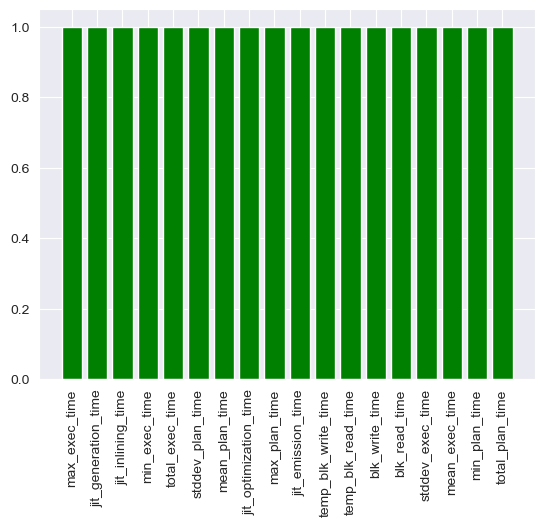

In [367]:
#visualize top 30 attributes most frequent for data type 'double precision'
fig = plt.figure()
plt.bar(att_name_count_double.keys(), att_name_count_double.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [368]:
#top 30 attributes most frequent for data type 'uuid'
df_uuid = df[df['datatype'] == 'uuid']
att_names_uuid = df_uuid.att_name.values
att_name_count_uuid =  {name: 0 for name in att_names_uuid}
for name in att_names_uuid:
    att_name_count_uuid[name] += 1
att_name_count_uuid = dict(sorted(att_name_count_uuid.items(), key=lambda item: item[1], reverse=True))
att_name_count_uuid = dict(list(att_name_count_uuid.items())[:30])

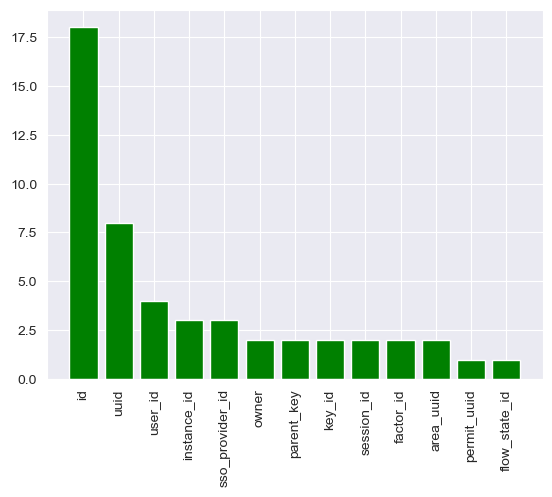

In [369]:
#visualize top 30 attributes most frequent for data type 'uuid'
fig = plt.figure()
plt.bar(att_name_count_uuid.keys(), att_name_count_uuid.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [370]:
#top 30 attributes most frequent for data type 'json', 'jsonb'
df_json = df[df['datatype'] == 'json']
df_jsonb = df[df['datatype'] == 'jsonb']
df_json_jsonb = pd.concat([df_json, df_jsonb])
att_names_json = df_json_jsonb.att_name.values
att_name_count_json =  {name: 0 for name in att_names_json}
for name in att_names_json:
    att_name_count_json[name] += 1
att_name_count_json = dict(sorted(att_name_count_json.items(), key=lambda item: item[1], reverse=True))
att_name_count_json = dict(list(att_name_count_json.items())[:30])


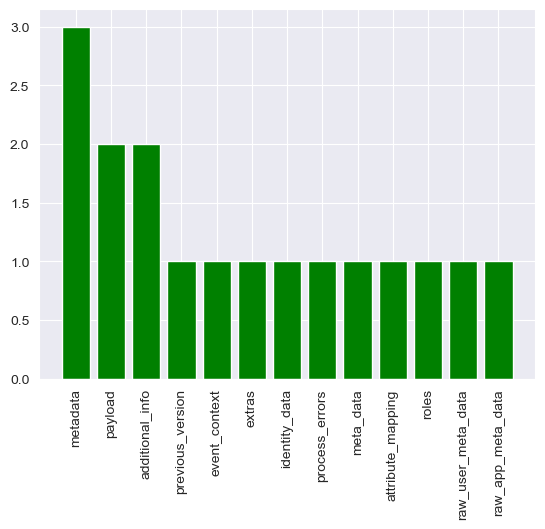

In [371]:
#visualize top 30 attributes most frequent for data type 'json', 'jsonb'
fig = plt.figure()
plt.bar(att_name_count_json.keys(), att_name_count_json.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [372]:
#top 30 attributes most frequent for data type 'ARRAY'
df_array = df[df['datatype'] == 'ARRAY']
att_names_array = df_array.att_name.values
att_name_count_array =  {name: 0 for name in att_names_array}
for name in att_names_array:
    att_name_count_array[name] += 1
att_name_count_array = dict(sorted(att_name_count_array.items(), key=lambda item: item[1], reverse=True))
att_name_count_array = dict(list(att_name_count_array.items())[:30])

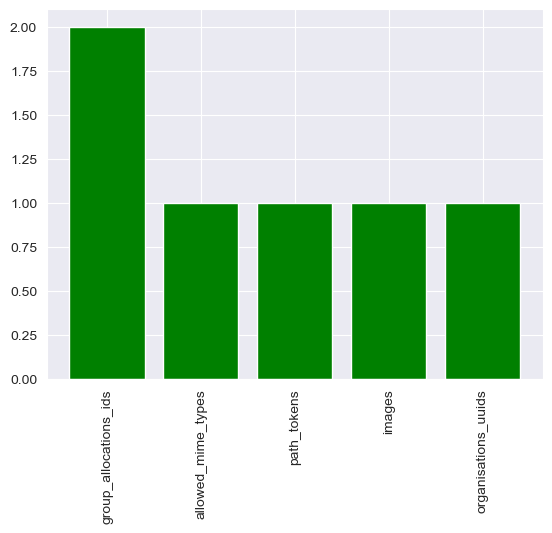

In [373]:
#visualize top 30 attributes most frequent for data type 'ARRAY'
fig = plt.figure()
plt.bar(att_name_count_array.keys(), att_name_count_array.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [374]:
#top 30 attributes most frequent for data type 'USER-DEFINED'
df_user_defined = df[df['datatype'] == 'USER-DEFINED']
att_names_user_defined = df_user_defined.att_name.values
att_name_count_user_defined =  {name: 0 for name in att_names_user_defined}
for name in att_names_user_defined:
    att_name_count_user_defined[name] += 1
att_name_count_user_defined = dict(sorted(att_name_count_user_defined.items(), key=lambda item: item[1], reverse=True))
att_name_count_user_defined = dict(list(att_name_count_user_defined.items())[:30])


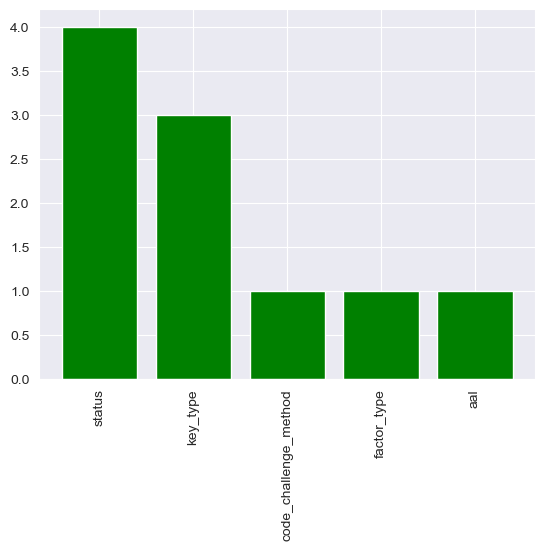

In [375]:
#visualize top 30 attributes most frequent for data type 'USER-DEFINED'
fig = plt.figure()
plt.bar(att_name_count_user_defined.keys(), att_name_count_user_defined.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [376]:
#top 30 attributes most frequent for data type 'bytea'
df_bytea = df[df['datatype'] == 'bytea']
att_names_bytea = df_bytea.att_name.values
att_name_count_bytea =  {name: 0 for name in att_names_bytea}
for name in att_names_bytea:
    att_name_count_bytea[name] += 1
att_name_count_bytea = dict(sorted(att_name_count_bytea.items(), key=lambda item: item[1], reverse=True))
att_name_count_bytea = dict(list(att_name_count_bytea.items())[:30])


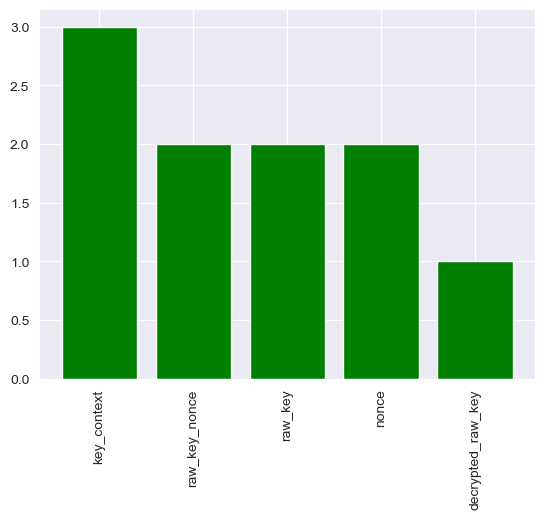

In [377]:
#visualize top 30 attributes most frequent for data type 'BYTEA'
fig = plt.figure()
plt.bar(att_name_count_bytea.keys(), att_name_count_bytea.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [378]:
#top 30 attributes most frequent for data type 'oid'
df_oid = df[df['datatype'] == 'oid']
att_names_oid = df_oid.att_name.values
att_name_count_oid =  {name: 0 for name in att_names_oid}
for name in att_names_oid:
    att_name_count_oid[name] += 1
att_name_count_oid = dict(sorted(att_name_count_oid.items(), key=lambda item: item[1], reverse=True))
att_name_count_oid = dict(list(att_name_count_oid.items())[:30])

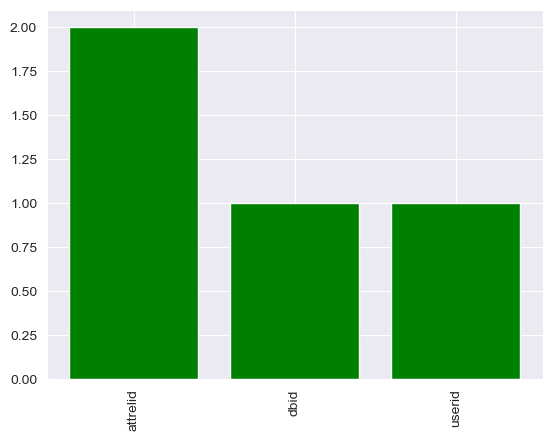

In [379]:
#visualize top 30 attributes most frequent for data type 'oid'
fig = plt.figure()
plt.bar(att_name_count_oid.keys(), att_name_count_oid.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [380]:
#top 30 attributes most frequent for data type 'name'
df_name = df[df['datatype'] == 'name']
att_names_name = df_name.att_name.values
att_name_count_name =  {name: 0 for name in att_names_name}
for name in att_names_name:
    att_name_count_name[name] += 1
att_name_count_name = dict(sorted(att_name_count_name.items(), key=lambda item: item[1], reverse=True))
att_name_count_name = dict(list(att_name_count_name.items())[:30])

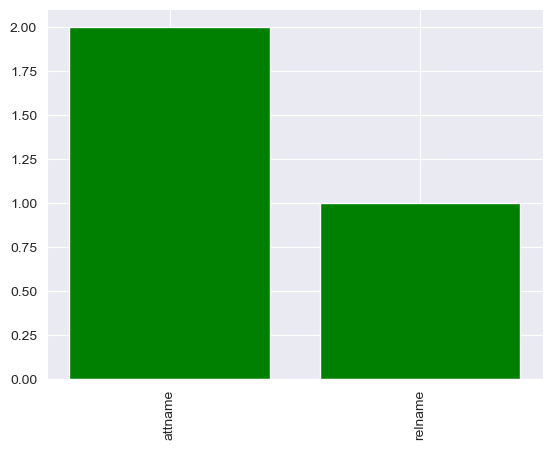

In [381]:
#visualize top 30 attributes most frequent for data type 'name'
fig = plt.figure()
plt.bar(att_name_count_name.keys(), att_name_count_name.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [382]:
#top 30 attributes most frequent for data type 'regnamespace'
df_regnamespace = df[df['datatype'] == 'regnamespace']
att_names_regnamespace = df_regnamespace.att_name.values
att_name_count_regnamespace =  {name: 0 for name in att_names_regnamespace}
for name in att_names_regnamespace:
    att_name_count_regnamespace[name] += 1
att_name_count_regnamespace = dict(sorted(att_name_count_regnamespace.items(), key=lambda item: item[1], reverse=True))
att_name_count_regnamespace = dict(list(att_name_count_regnamespace.items())[:30])


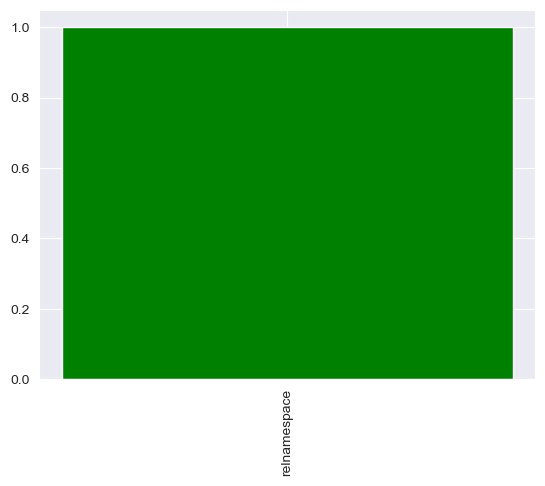

In [383]:
#visualize top 30 attributes most frequent for data type 'regnamespace'
fig = plt.figure()
plt.bar(att_name_count_regnamespace.keys(), att_name_count_regnamespace.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [384]:
#top 30 attributes most frequent for data type 'inet'
df_inet = df[df['datatype'] == 'inet']
att_names_inet = df_inet.att_name.values
att_name_count_inet =  {name: 0 for name in att_names_inet}
for name in att_names_inet:
    att_name_count_inet[name] += 1
att_name_count_inet = dict(sorted(att_name_count_inet.items(), key=lambda item: item[1], reverse=True))
att_name_count_inet = dict(list(att_name_count_inet.items())[:30])

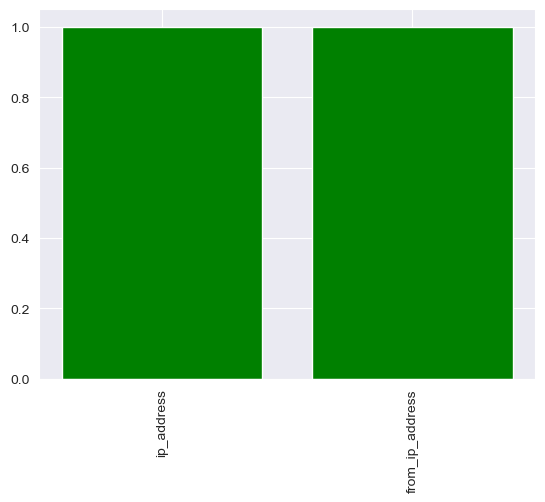

In [385]:
#visualize top 30 attributes most frequent for data type 'inet'
fig = plt.figure()
plt.bar(att_name_count_inet.keys(), att_name_count_inet.values(), color='g')
plt.xticks(rotation=90)
plt.show()

### Data Preparation

Data Type Profiling

In [386]:
df.columns

Index(['att_name', 'datatype', 'semantic_type', 'correct_data_type'], dtype='object')

In [387]:
df['datatype'].unique()

array(['bigint', 'text', 'timestamp without time zone',
       'character varying', 'integer', 'boolean', 'uuid', 'jsonb', 'json',
       'timestamp with time zone', 'ARRAY', 'USER-DEFINED', 'bytea',
       'oid', 'name', 'regnamespace', 'inet', 'date', 'double precision',
       'numeric', 'smallint'], dtype=object)

In [388]:
df['datatype']
data_type_list = ['bigint', 'int8', 'bigserial','serial8', 'bit', 'bit varying', 'varbit','boolean', 'bytea', 'character', 'char', 'character varying',
                  'varchar', 'date', 'double precision', 'float8', 'inet',
                  'integer', 'int4', 'int', 'jsonb', 'json', 'money', 'numeric', 'decimal', 'real','float4', 'smallint', 'int2',
                  'smallserial', 'serial2', 'serial', 'serial4', 'text', 'time', 'timestamp',
                  'time without time zone', 'time with time zone','timestamp without time zone', 'timestamp with time zone', 'uuid']
converted_df = df[df['datatype'].isin(data_type_list)]
conversion_mapping = {
    'int2': 'bigint', 'int4': 'bigint', 'int8': 'bigint', 'smallint': 'bigint', 'bigserial': 'bigint', 'smallserial': 'bigint', 'integer': 'bigint',
    'serial': 'bigint', 'float4': 'double_precision', 'float': 'double_precision', 'float8': 'double_precision','real': 'double_precision','double precision': 'double_precision',
    'decimal': 'double_precision', 'numeric': 'double_precision',
    'money': 'double_precision', 'bit varying': 'character_varying', 'character varying': 'character_varying', 'varbit': 'character_varying',
    'varchar': 'character_varying', 'character': 'character_varying',
    'text': 'character_varying', 'time without time zone': 'time', 'time with time zone': 'time','timestamp without time zone': 'timestamp',
    'timestamp with time zone': 'timestamp', 'jsonb': 'json'
}
converted_df['datatype'] = df['datatype'].replace(conversion_mapping)
converted_df

C:\Users\Nhat\AppData\Local\Temp\ipykernel_8740\1636379566.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['datatype'] = df['datatype'].replace(conversion_mapping)


,att_name,datatype,semantic_type,correct_data_type
0,id,bigint,Identifier,bigint
1,name,character_varying,Name,text
2,created_at,timestamp,event timestamp,timestamp without time zone
3,updated_at,timestamp,event timestamp,timestamp without time zone
4,right_identifier,character_varying,Identifier,character varying
...,...,...,...,...
600,created_at,timestamp,event timestamp,timestamp without time zone
601,max_retries,bigint,Count,integer
602,owner_type,character_varying,Category,character varying
603,active,boolean,Flag,boolean


In [389]:
#unique data types
unique_data_types = converted_df.datatype.unique()
print('unique data types: ', unique_data_types)
print('Number of unique data types: {:,}\n'.format(len(unique_data_types)))

unique data types:  ['bigint' 'character_varying' 'timestamp' 'boolean' 'uuid' 'json' 'bytea'
 'inet' 'date' 'double_precision']
Number of unique data types: 10



In [390]:
converted_df['correct_data_type']
data_type_list = ['bigint', 'int8', 'bigserial','serial8', 'bit', 'bit varying', 'varbit','boolean', 'bytea', 'character', 'char', 'character varying',
                  'varchar', 'date', 'double precision', 'float8', 'inet',
                  'integer', 'int4', 'int', 'jsonb', 'json', 'money', 'numeric', 'decimal', 'real','float4', 'smallint', 'int2',
                  'smallserial', 'serial2', 'serial', 'serial4', 'text', 'time', 'timestamp',
                  'time without time zone', 'time with time zone','timestamp without time zone', 'timestamp with time zone', 'uuid']
converted_df_final = converted_df[converted_df['correct_data_type'].isin(data_type_list)]
conversion_mapping = {
    'int2': 'bigint', 'int4': 'bigint', 'int8': 'bigint', 'smallint': 'bigint', 'bigserial': 'bigint', 'smallserial': 'bigint', 'integer': 'bigint',
'serial': 'bigint', 'float4': 'double_precision', 'float': 'double_precision', 'float8': 'double_precision','real': 'double_precision','double precision': 'double_precision',
    'decimal': 'double_precision', 'numeric': 'double_precision',
    'money': 'double_precision', 'bit varying': 'character_varying', 'character varying': 'character_varying', 'varbit': 'character_varying',
    'varchar': 'character_varying', 'character': 'character_varying',
    'text': 'character_varying', 'time without time zone': 'time', 'time with time zone': 'time','timestamp without time zone': 'timestamp',
    'timestamp with time zone': 'timestamp', 'jsonb': 'json'
}
converted_df['correct_data_type'] = converted_df['correct_data_type'].replace(conversion_mapping)
converted_df_final

C:\Users\Nhat\AppData\Local\Temp\ipykernel_8740\635706777.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['correct_data_type'] = converted_df['correct_data_type'].replace(conversion_mapping)


,att_name,datatype,semantic_type,correct_data_type
0,id,bigint,Identifier,bigint
1,name,character_varying,Name,text
2,created_at,timestamp,event timestamp,timestamp without time zone
3,updated_at,timestamp,event timestamp,timestamp without time zone
4,right_identifier,character_varying,Identifier,character varying
...,...,...,...,...
600,created_at,timestamp,event timestamp,timestamp without time zone
601,max_retries,bigint,Count,integer
602,owner_type,character_varying,Category,character varying
603,active,boolean,Flag,boolean


In [391]:
#unique data types
unique_data_types = converted_df.correct_data_type.unique()
print('unique data types: ', unique_data_types)
print('Number of unique data types: {:,}\n'.format(len(unique_data_types)))

unique data types:  ['bigint' 'character_varying' 'timestamp' 'bytea' 'boolean' 'uuid' 'json'
 'inet' ',' 'double_precision' 'date']
Number of unique data types: 11



In [392]:
#remove null values
# converted_df.dropna(inplace=True)

In [393]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 604
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   att_name           581 non-null    object
 1   datatype           581 non-null    object
 2   semantic_type      478 non-null    object
 3   correct_data_type  581 non-null    object
dtypes: object(4)
memory usage: 22.7+ KB


In [394]:
converted_df.describe()

,att_name,datatype,semantic_type,correct_data_type
count,581,581,478,581
unique,289,10,41,11
top,id,character_varying,event timestamp,character_varying
freq,57,176,142,149


### Convert to CSV

In [395]:
converted_df.to_csv('converted_dataset.csv', encoding='utf-8')